# **City of Chicago Traffic Crashes**

<div style="width: 2000px; overflow: hidden;">
  <header style="height: 5in; display: flex; justify-content: center; align-items: center;">
    <img src="..\chicago2.png" alt="Chicago skyline" style="height: 5in; width: 100%; object-fit: cover;"/>
  </header>
</div>


# **1. Business Understanding**

### **Problem:**
Traffic accidents are a significant issue in large cities like Chicago, causing property damage, injuries, and fatalities. Identifying the primary causes of these accidents can help city planners, traffic safety boards, and policymakers take proactive measures to reduce accidents and improve road safety. The dataset used in this project, provided by the City of Chicago, includes detailed information about accidents, vehicles, and the people involved, offering a rich resource for understanding the underlying causes of crashes.

### **Stakeholders:**
- **Vehicle Safety Boards**: These organizations are tasked with analyzing traffic accidents and implementing strategies to prevent future incidents. They could use the findings from this project to identify key risk factors contributing to accidents and introduce targeted interventions.
- **City of Chicago**: City officials and traffic planners could benefit from the insights gained from this project by making data-driven decisions to improve road safety infrastructure, optimize traffic management, and reduce accident rates.

### **Project Goals:**
The goal of this project is to build a model that predicts the **primary contributory cause** of a car accident based on factors such as road conditions, vehicle characteristics, and the people involved. Since the original dataset contains over 40 unique contributory causes, we have grouped these into 5 main categories to make the task more manageable. The project also uses different classification models and iterating on them to achieve the best possible results. The target variable, `PRIM_CONTRIBUTORY_CAUSE`, represents the main reason for each accident.

### **Approach:**
- **Target Simplification**: To make the problem manageable, we grouped the 40 unique values of the `PRIM_CONTRIBUTORY_CAUSE` column into 5 broad categories.
- **Classification Models**: We approached this as a classification problem, iterating through various models like Logistic Regression, Random Forest, and XGBoost, and Neural Networks, refining hyperparameters and improving upon each model.


### **Objectives:**

1. **Main Objective**: 
   - Build a model to predict the **PRIM_CONTRIBUTORY_CAUSE** of car accidents. The model should highlight the key factors contributing to accidents, such as **driver error**, **environmental factors**, **alcohol/drugs**, **mechanical failures**,  **pedestrian/cyclist errors**, and **others**. These insights will support traffic safety boards in designing targeted prevention strategies.

2. **Data Quality**: 
   - Ensure the dataset is of high quality by maintaining completeness and accuracy, especially in critical variables like road conditions, weather, and vehicle information. Reliable data will enable more accurate predictions and ensure robust models.

3. **Data Imbalance**: 
   - Address the severe imbalance in the target variable (`PRIM_CONTRIBUTORY_CAUSE`) by applying techniques such as **SMOTE**, **class weighting**, or **ensemble methods**. Handling imbalance effectively will result in models that perform better across all categories, not just the dominant ones.

4. **Feature Importance**: 
   - Investigate the relationships between key features, such as **road conditions**, **vehicle types**, and **driver behavior**. Interaction features and deeper insights into how these variables influence accidents can improve model performance and offer more actionable insights for stakeholders.



# **2. Data Understanding**
The dataset used for this project comes from the City of Chicago and includes detailed information on vehicle crashes, along with additional data on the involved vehicles and people. (https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data)

### **a) Imported relevant modules**


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### **b) Loading the dataset**

In [141]:
#from google.colab import drive


# Mount your Google Drive
#drive.mount('/content/drive')

# Now you can read the CSV file
#df = pd.read_csv('/content/drive/My Drive/Traffic_Crashes_-_Crashes_20241007.csv')  # Updated path
#df.head()

In [142]:
data = pd.read_csv('..\Traffic_Crashes_-_Crashes_20241010.csv')
data.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


### **c) Data Shape**

In [143]:
print('Our data has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

Our data has 881316 rows and 48 columns


### **d) Data Description**

In [144]:
data.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,881316.000000,1.990170e+05,881316.00000,881311.000000,881316.000000,879371.000000,879371.000000,879371.00000,879371.000000,879371.000000,879371.000000,879371.0,881316.000000,881316.000000,881316.000000,875032.000000,875032.000000
mean,28.418132,1.332970e+01,3687.43465,1244.790214,2.035163,0.193642,0.001188,0.01982,0.108670,0.063964,2.001278,0.0,13.204026,4.120368,6.646201,41.855122,-87.673690
std,6.121071,2.961542e+03,2880.56134,704.988384,0.452429,0.571621,0.037365,0.16492,0.425142,0.325155,1.157169,0.0,5.573179,1.981708,3.363464,0.333964,0.678455
min,0.000000,0.000000e+00,0.00000,111.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1250.00000,715.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.783065,-87.721824
50%,30.000000,2.000000e+00,3201.00000,1212.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874951,-87.674228
75%,30.000000,4.000000e+00,5562.00000,1822.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.924518,-87.633520
max,99.000000,1.191625e+06,451100.00000,6100.000000,18.000000,21.000000,4.000000,10.00000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


Our data includes conditions surrounding a crash as well as the crash's outcome.

The columns include:
1. CRASH_RECORD_ID: Unique ID for each crash, used to link to related datasets.
2. CRASH_DATE_EST_I: Estimated crash date if reported later.
3. CRASH_DATE: Date and time of the crash.
4. POSTED_SPEED_LIMIT: Speed limit at the crash location.
5. TRAFFIC_CONTROL_DEVICE: Traffic control device present.
6. DEVICE_CONDITION: Condition of the traffic control device.
7. WEATHER_CONDITION: Weather at the time of the crash.
8. LIGHTING_CONDITION: Lighting at the time of the crash.
9. FIRST_CRASH_TYPE: Type of first collision.
10. TRAFFICWAY_TYPE: Type of trafficway.
11. LANE_CNT: Number of through lanes.
12. ALIGNMENT: Street alignment.
13. ROADWAY_SURFACE_COND: Road surface condition.
14. ROAD_DEFECT: Road defects.
15. REPORT_TYPE: Type of report (at scene, at desk, amended).
16. CRASH_TYPE: Severity classification of the crash.
17. INTERSECTION_RELATED_I: Whether an intersection played a role.
18. NOT_RIGHT_OF_WAY_I: Whether the crash occurred outside the public right-of-way.
19. HIT_AND_RUN_I: Whether it was a hit-and-run.
20. DAMAGE: Estimated damage.
21. DATE_POLICE_NOTIFIED: Date police were notified.
22. **PRIM_CONTRIBUTORY_CAUSE: Primary cause of the crash**
23. SEC_CONTRIBUTORY_CAUSE: Secondary cause of the crash.
24. STREET_NO: Street address number.
25. STREET_DIRECTION: Street address direction.
26. STREET_NAME: Street address name.
27. BEAT_OF_OCCURRENCE: Chicago Police Department Beat ID.
28. PHOTOS_TAKEN_I: Whether photos were taken.
29. STATEMENTS_TAKEN_I: Whether statements were taken.
30. DOORING_I: Whether it involved dooring.
31. WORK_ZONE_I: Whether it occurred in a work zone.
32. WORK_ZONE_TYPE: Type of work zone.
33. WORKERS_PRESENT_I: Whether workers were present.
34. NUM_UNITS: Number of units involved.
35. MOST_SEVERE_INJURY: Most severe injury sustained1.
36. INJURIES_TOTAL: Total number of injuries.
37. NJURIES_FATAL: Number of fatal injuries.
38. INJURIES_INCAPACITATING: Number of incapacitating injuries.
39. INJURIES_NON_INCAPACITATING: Number of non-incapacitating injuries.
40. INJURIES_REPORTED_NOT_EVIDENT: Number of reported but not evident injuries.
41. INJURIES_NO_INDICATION: Number of no indication of injuries.
42. INJURIES_UNKNOWN: Number of unknown injuries.
43. CRASH_HOUR: Hour of the crash.
44. CRASH_DAY_OF_WEEK: Day of the week of the crash.
45. CRASH_MONTH: Month of the crash.
46. LATITUDE: Latitude of the crash location.
47. LONGITUDE: Longitude of the crash location.
48. LOCATION: Geographic location of the crash.

PRIM_CONTRIBUTORY_CAUSE and SEC_CONTRIBUTORY_CAUSE are closely related. Below we compare how frequently each variable appears in the respective columns

In [145]:
print('Variabe, PRIM_CONTRIBUTORY_CAUSE, SEC_CONTRIBUTORY_CAUSE') #creates a header for our output

#summarizes variables in our target by percentage
for i in data['PRIM_CONTRIBUTORY_CAUSE'].unique():
    prim_percentage = (data['PRIM_CONTRIBUTORY_CAUSE'].value_counts()[i]/data['PRIM_CONTRIBUTORY_CAUSE'].value_counts().sum())*100
    sec_percentage = (data['SEC_CONTRIBUTORY_CAUSE'].value_counts()[i]/data['SEC_CONTRIBUTORY_CAUSE'].value_counts().sum())*100 if i in data['SEC_CONTRIBUTORY_CAUSE'].unique() else None
    print(f"{i}, {prim_percentage:.2f}%", end='')
    if sec_percentage is not None:
        print(f", {sec_percentage:.2f}%", end='')
    print()

Variabe, PRIM_CONTRIBUTORY_CAUSE, SEC_CONTRIBUTORY_CAUSE
FOLLOWING TOO CLOSELY, 9.66%, 2.63%
FAILING TO REDUCE SPEED TO AVOID CRASH, 4.20%, 3.69%
UNABLE TO DETERMINE, 39.08%, 36.06%
IMPROPER BACKING, 3.88%, 0.80%
IMPROPER TURNING/NO SIGNAL, 3.34%, 1.03%
NOT APPLICABLE, 5.30%, 41.21%
WEATHER, 1.44%, 1.11%
IMPROPER OVERTAKING/PASSING, 4.97%, 1.55%
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE, 3.39%, 3.10%
IMPROPER LANE USAGE, 3.56%, 1.41%
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.), 0.57%, 0.31%
ROAD ENGINEERING/SURFACE/MARKING DEFECTS, 0.24%, 0.09%
FAILING TO YIELD RIGHT-OF-WAY, 11.02%, 3.19%
EQUIPMENT - VEHICLE CONDITION, 0.62%, 0.20%
RELATED TO BUS STOP, 0.05%, 0.05%
DISREGARDING OTHER TRAFFIC SIGNS, 0.21%, 0.10%
DRIVING ON WRONG SIDE/WRONG WAY, 0.54%, 0.21%
ROAD CONSTRUCTION/MAINTENANCE, 0.21%, 0.12%
DISTRACTION - FROM INSIDE VEHICLE, 0.68%, 0.30%
ANIMAL, 0.08%, 0.05%
TEXTING, 0.04%, 0.02%
DISREGARDING TRAFFIC SIGNALS, 1.96%, 0.41%
DISREGARDING ROAD MARKINGS, 0.12%, 0.10%
CELL PHONE 

'PRIM_CONTRIBUTORY_CAUSE' and 'SEC_CONTRIBUTORY_CAUSE' are obviously very highly related. Hence we will drop 'SEC_CONTRIBUTORY_CAUSE'

In [146]:

print(f'Our target variable has {data["PRIM_CONTRIBUTORY_CAUSE"].nunique()} unique values')

Our target variable has 40 unique values


Below we summarize related variables into 6 main groups based on how closely they are related to reduce the number of unique values and make our classification task easier to handle

In [147]:
def categorize_cause(cause):
    if cause in [
        'FAILING TO YIELD RIGHT-OF-WAY', 'FOLLOWING TOO CLOSELY', 'IMPROPER LANE USAGE',
        'DISREGARDING TRAFFIC SIGNALS', 'DISTRACTION - FROM INSIDE VEHICLE',
        'DISTRACTION - FROM OUTSIDE VEHICLE', 'IMPROPER TURNING/NO SIGNAL',
        'IMPROPER BACKING', 'TURNING RIGHT ON RED', 'DRIVING ON WRONG SIDE/WRONG WAY',
        'DISREGARDING STOP SIGN', 'CELL PHONE USE OTHER THAN TEXTING', 'TEXTING',
        'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)'
    ]:
        return 'Driver Error'

    elif cause in [
        'WEATHER', 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 'ROADWAY SURFACE COND_ICE',
        'ROAD CONSTRUCTION/MAINTENANCE', 'ROAD DEFECT_UNKNOWN', 'LIGHTING_CONDITION_DARKNESS',
        'LIGHTING_CONDITION_DAWN', 'LIGHTING_CONDITION_DUSK'
    ]:
        return 'Environmental Factors'

    elif cause in [
        'EQUIPMENT - VEHICLE CONDITION', 'BRAKE FAILURE', 'TIRE FAILURE', 'ENGINE FAILURE',
        'AIRBAG DEPLOYED_DID NOT DEPLOY'
    ]:
        return 'Mechanical Failures'

    elif cause in [
        'PEDESTRIAN ACTIONS', 'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 'RELATED TO BUS STOP',
        'OBSTRUCTED CROSSWALKS', 'ELECTRONIC DEVICE USE BY PEDESTRIAN'
    ]:
        return 'Pedestrian/Cyclist Errors'

    elif cause in [
        'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 'PHYSICAL CONDITION OF DRIVER',
        'SLEEPING AT THE WHEEL'
    ]:
        return 'Alcohol/Drugs and Physical Condition'

    else:
        return 'Other'


In [148]:
data['PRIM_CONTRIBUTORY_CAUSE_GROUPED'] = data['PRIM_CONTRIBUTORY_CAUSE'].apply(categorize_cause)
data = data.drop(columns=['PRIM_CONTRIBUTORY_CAUSE'])

print(f'Our target variable now has {data["PRIM_CONTRIBUTORY_CAUSE_GROUPED"].nunique()} unique values')


Our target variable now has 6 unique values


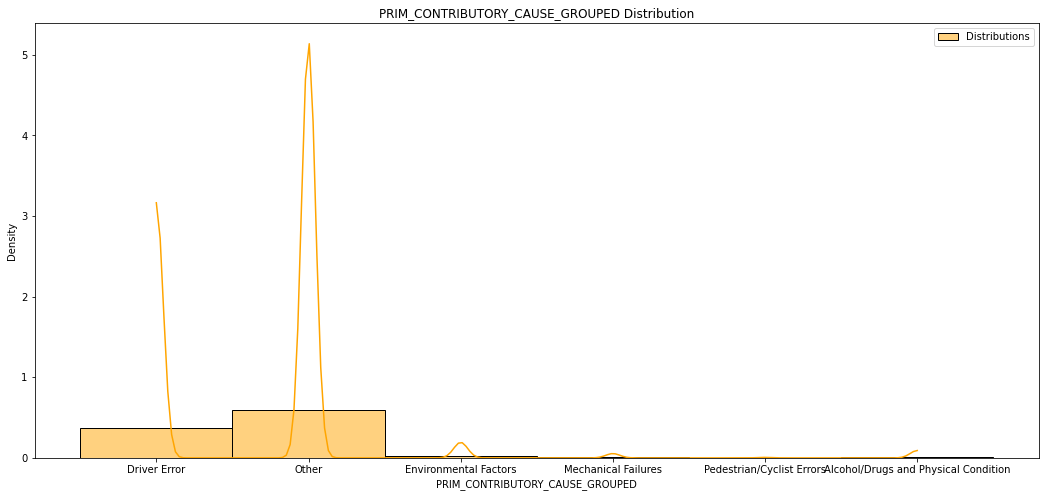

In [149]:
# Compare the distribution of variables in our target
plt.figure(figsize=(18, 8))

sns.histplot(data['PRIM_CONTRIBUTORY_CAUSE_GROUPED'], color='orange', label='Distributions', stat='density', kde=True)

plt.legend()
plt.title('PRIM_CONTRIBUTORY_CAUSE_GROUPED Distribution')
plt.show()


### **e) Duplicates**

In [150]:
data.duplicated().sum()

0

There are no duplicates in our dataset

### **f) Datatypes**

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881316 entries, 0 to 881315
Data columns (total 48 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CRASH_RECORD_ID                  881316 non-null  object 
 1   CRASH_DATE_EST_I                 65291 non-null   object 
 2   CRASH_DATE                       881316 non-null  object 
 3   POSTED_SPEED_LIMIT               881316 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE           881316 non-null  object 
 5   DEVICE_CONDITION                 881316 non-null  object 
 6   WEATHER_CONDITION                881316 non-null  object 
 7   LIGHTING_CONDITION               881316 non-null  object 
 8   FIRST_CRASH_TYPE                 881316 non-null  object 
 9   TRAFFICWAY_TYPE                  881316 non-null  object 
 10  LANE_CNT                         199017 non-null  float64
 11  ALIGNMENT                        881316 non-null  object 
 12  RO

Our dataset is quite large with several columns that seem to contain similar information.



Below we drop some columns that have limited useful information given our overall objective and similarity to other columns which we will include in our dataset. 

In [152]:
columns_to_drop = ['CRASH_RECORD_ID','CRASH_DATE_EST_I', 'CRASH_DATE','REPORT_TYPE', 'PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I',
'DOORING_I','STREET_NO','STREET_DIRECTION','DATE_POLICE_NOTIFIED','BEAT_OF_OCCURRENCE','LANE_CNT','LATITUDE',
'LONGITUDE','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','SEC_CONTRIBUTORY_CAUSE', 'LOCATION']

relevant_data = data.drop(columns = columns_to_drop, axis=1)
relevant_data.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,PRIM_CONTRIBUTORY_CAUSE_GROUPED
0,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,12,6,8,Driver Error
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,14,7,7,Other
2,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,17,6,8,Other
3,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,CURVE ON GRADE,DRY,NO DEFECTS,...,2,FATAL,1.0,1.0,0.0,0.0,8,3,11,Other
4,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,10,6,8,Driver Error


In [153]:
print('Our data now has {} rows and {} columns'.format(relevant_data.shape[0], relevant_data.shape[1]))

Our data now has 881316 rows and 29 columns


### **g) Missing Values**

Next, we will look at missing data by column percentage.

In [154]:
relevant_data.isna().sum()/data.shape[0]*100

POSTED_SPEED_LIMIT                  0.000000
TRAFFIC_CONTROL_DEVICE              0.000000
DEVICE_CONDITION                    0.000000
WEATHER_CONDITION                   0.000000
LIGHTING_CONDITION                  0.000000
FIRST_CRASH_TYPE                    0.000000
TRAFFICWAY_TYPE                     0.000000
ALIGNMENT                           0.000000
ROADWAY_SURFACE_COND                0.000000
ROAD_DEFECT                         0.000000
CRASH_TYPE                          0.000000
INTERSECTION_RELATED_I             77.061803
NOT_RIGHT_OF_WAY_I                 95.431945
HIT_AND_RUN_I                      68.639512
DAMAGE                              0.000000
STREET_NAME                         0.000113
WORK_ZONE_I                        99.436184
WORK_ZONE_TYPE                     99.564401
WORKERS_PRESENT_I                  99.854990
NUM_UNITS                           0.000000
MOST_SEVERE_INJURY                  0.222281
INJURIES_TOTAL                      0.220693
INJURIES_F

We will start by inspecting and handling columns with a large amount of missing data

In [155]:
for col in relevant_data.columns:
    if relevant_data[col].isna().sum()/relevant_data.shape[0]*100 > 50:
        print(f'{col}\n Missing value percent {relevant_data[col].isna().sum()/relevant_data.shape[0]*100:.2f}\n Unique values {relevant_data[col].unique()}')

INTERSECTION_RELATED_I
 Missing value percent 77.06
 Unique values [nan 'Y' 'N']
NOT_RIGHT_OF_WAY_I
 Missing value percent 95.43
 Unique values [nan 'Y' 'N']
HIT_AND_RUN_I
 Missing value percent 68.64
 Unique values [nan 'Y' 'N']
WORK_ZONE_I
 Missing value percent 99.44
 Unique values [nan 'Y' 'N']
WORK_ZONE_TYPE
 Missing value percent 99.56
 Unique values [nan 'CONSTRUCTION' 'UTILITY' 'UNKNOWN' 'MAINTENANCE']
WORKERS_PRESENT_I
 Missing value percent 99.85
 Unique values [nan 'Y' 'N']


We can drop these columns as they contain a large amount of missing data and imputing them based on mean, mode or median will change their distributions

In [156]:
columns_to_drop = [col for col in relevant_data.columns if relevant_data[col].isna().sum()/relevant_data.shape[0]*100 > 50]
relevant_data = relevant_data.drop(columns = columns_to_drop, axis=1)

print(relevant_data.isna().sum())


POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
CRASH_TYPE                            0
DAMAGE                                0
STREET_NAME                           1
NUM_UNITS                             0
MOST_SEVERE_INJURY                 1959
INJURIES_TOTAL                     1945
INJURIES_FATAL                     1945
INJURIES_INCAPACITATING            1945
INJURIES_NON_INCAPACITATING        1945
CRASH_HOUR                            0
CRASH_DAY_OF_WEEK                     0
CRASH_MONTH                           0
PRIM_CONTRIBUTORY_CAUSE_GROUPED       0
dtype: int64


We can drop the remaining columns with missing values as their number is small and unlikely to affect the overall data distribution materially

In [157]:
relevant_data = relevant_data.dropna()
print('We now have {} rows with missing values'.format(relevant_data.isna().sum().sum()))
print('Our data now has {} rows and {} columns'.format(relevant_data.shape[0], relevant_data.shape[1]))

We now have 0 rows with missing values
Our data now has 879356 rows and 23 columns


### **h) Variable Types**

In [158]:
# Separate categorical columns
categorical_columns = relevant_data.select_dtypes(include=['object']).columns.tolist()

# Separate continuous (numerical) columns
continuous_columns = relevant_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the separated columns
print(f"We have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

We have 14 categorical columns and 9 continuous columns


# **3. EDA & Data Preparation**

### **a) Basic Descriptive Statistics**

- **Continuous Columns:** We will get an overview of the distribution, central tendency, and spread

In [159]:
relevant_data[continuous_columns].describe()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
count,879356.000000,879356.000000,879356.000000,879356.000000,879356.000000,879356.000000,879356.000000,879356.000000,879356.000000
mean,28.423983,2.035989,0.193645,0.001188,0.019820,0.108672,13.208652,4.120734,6.645852
std,6.114623,0.450910,0.571626,0.037366,0.164921,0.425145,5.567887,1.981332,3.363492
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,4.000000
50%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000,7.000000
75%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,17.000000,6.000000,9.000000
max,99.000000,18.000000,21.000000,4.000000,10.000000,21.000000,23.000000,7.000000,12.000000


Our continuous data seems to have different scales across different features. Hence we may need to scale it

- **Categorical Columns:** We will get an overview of the distribution in each categorical column

In [161]:
relevant_data[categorical_columns].describe()

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,STREET_NAME,MOST_SEVERE_INJURY,PRIM_CONTRIBUTORY_CAUSE_GROUPED
count,879356,879356,879356,879356,879356,879356,879356,879356,879356,879356,879356,879356,879356,879356
unique,19,8,12,6,18,20,6,7,7,2,3,1645,5,6
top,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",WESTERN AVE,NO INDICATION OF INJURY,Other
freq,497956,503888,692413,566484,203418,379550,858549,651303,702166,643328,551652,24032,755902,523251


Some of our categorical features have a lot of categories. Hence we may need to use **target encoding** to deal with high cardinality.

Target encoding replaces each category with the mean of the target variable for that category. This reduces the dimensionality by not increasing the number of features, which can help in preventing overfitting. Example: If a category is frequently associated with fatalities, the encoding will reflect that association. Target encoding should not alter the shape of our data.

### **c) Visualizations**

We will use visualizations to help display the relationships and patterns in our data intuitively.

- **Distribution of continuous features:**

**1) Histograms**

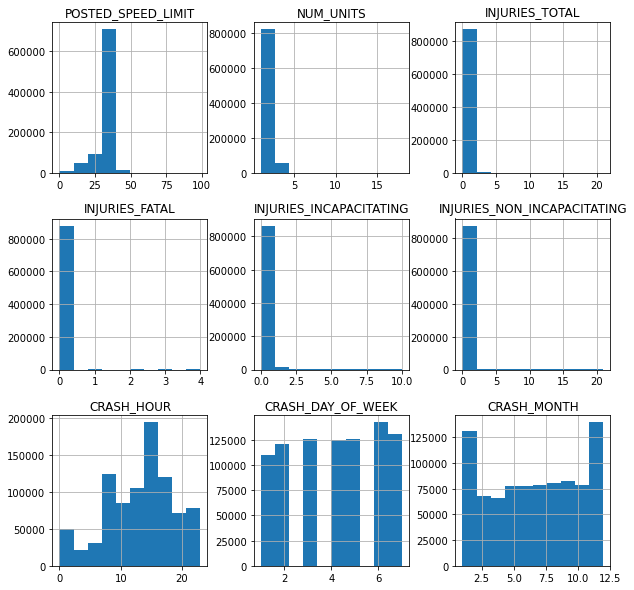

In [162]:
import matplotlib.pyplot as plt
relevant_data[continuous_columns].hist(figsize=(10, 10), bins=10) #plot histograms
plt.show()


Although we currently classify 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', as continuous features, their distributions imply that they represent discrete time periods rather than a continuous range. Each hour, day, and month is a distinct category which may have unique traffic patterns. We will convert these features to categorical

In [163]:
time_col = ['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']


for col in time_col:
  if col in relevant_data[continuous_columns]:
    categorical_columns.append(col)
    continuous_columns.remove(col)
    relevant_data[col] = relevant_data[col].astype('object')
  else:
    continue
print('Time columns already removed')


print(f"We now have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

Time columns already removed
We now have 17 categorical columns and 6 continuous columns


We can also visualize our continuous columns using boxplots to check for outliers

**2) Boxplots**

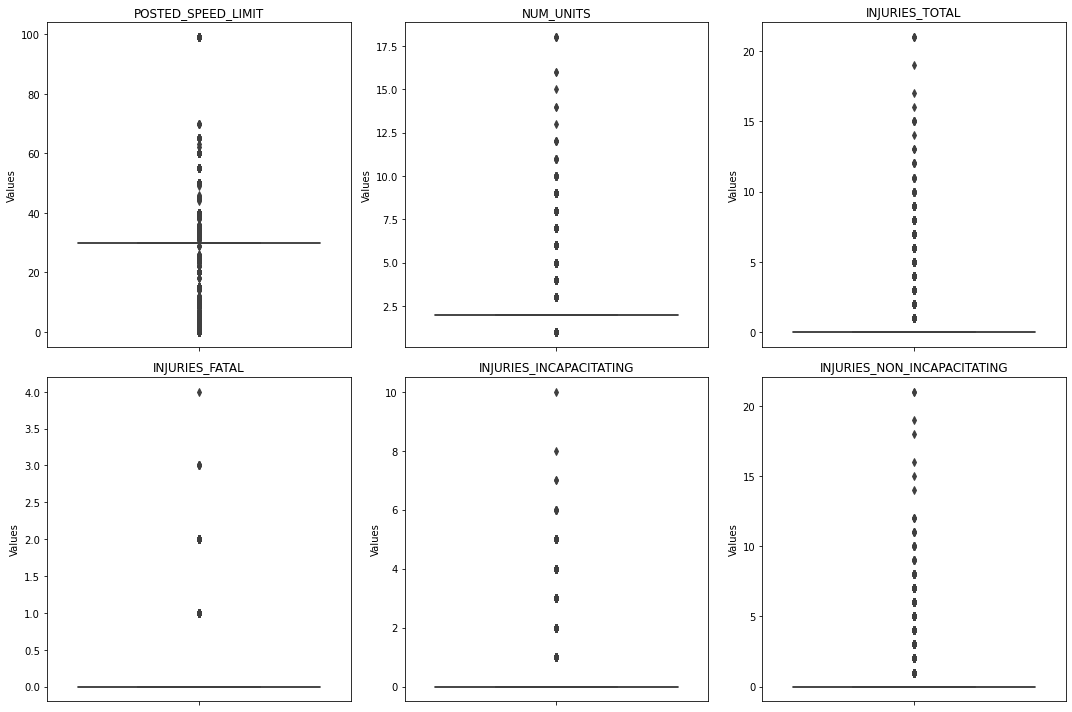

In [164]:
# Create a grid of subplots with 2 rows and 3 columns
n_cols = 3
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # create subplots

# Iterate over the continuous columns and plot each one in a separate subplot
for i, col in enumerate(continuous_columns):
    # Get the appropriate subplot
    ax = axes[i // n_cols, i % n_cols]

    sns.boxplot(y=relevant_data[col], ax=ax)

    # Set the title of the subplot
    ax.set_title(col)

    # Set labels for y-axis
    ax.set_ylabel("Values")

# Hide any empty subplots
for i in range(len(continuous_columns), n_rows * n_cols):
    ax = axes[i // n_cols, i % n_cols]
    ax.axis('off')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Looking at the boxplots, our continuous columns appear concentrated in certain values likely due to the nature of the crash data. It seems like there might be a lot of zero values which might give the appearance of categories but the features are actually continuous.

- **POSTED_SPEED_LIMIT:** This is continuous, but there might be common values (e.g., 30, 40 mph) that make it appear categorical.
- **NUM_UNITS:** The number of units (vehicles, people) involved in a crash. This is likely continuous (discrete, but not categorical).
- **INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING:** These are continuous as they count the number of injuries, though they might have many zeroes.

Further, our data does not seem to have any outliers.

**3) Bar Plots**

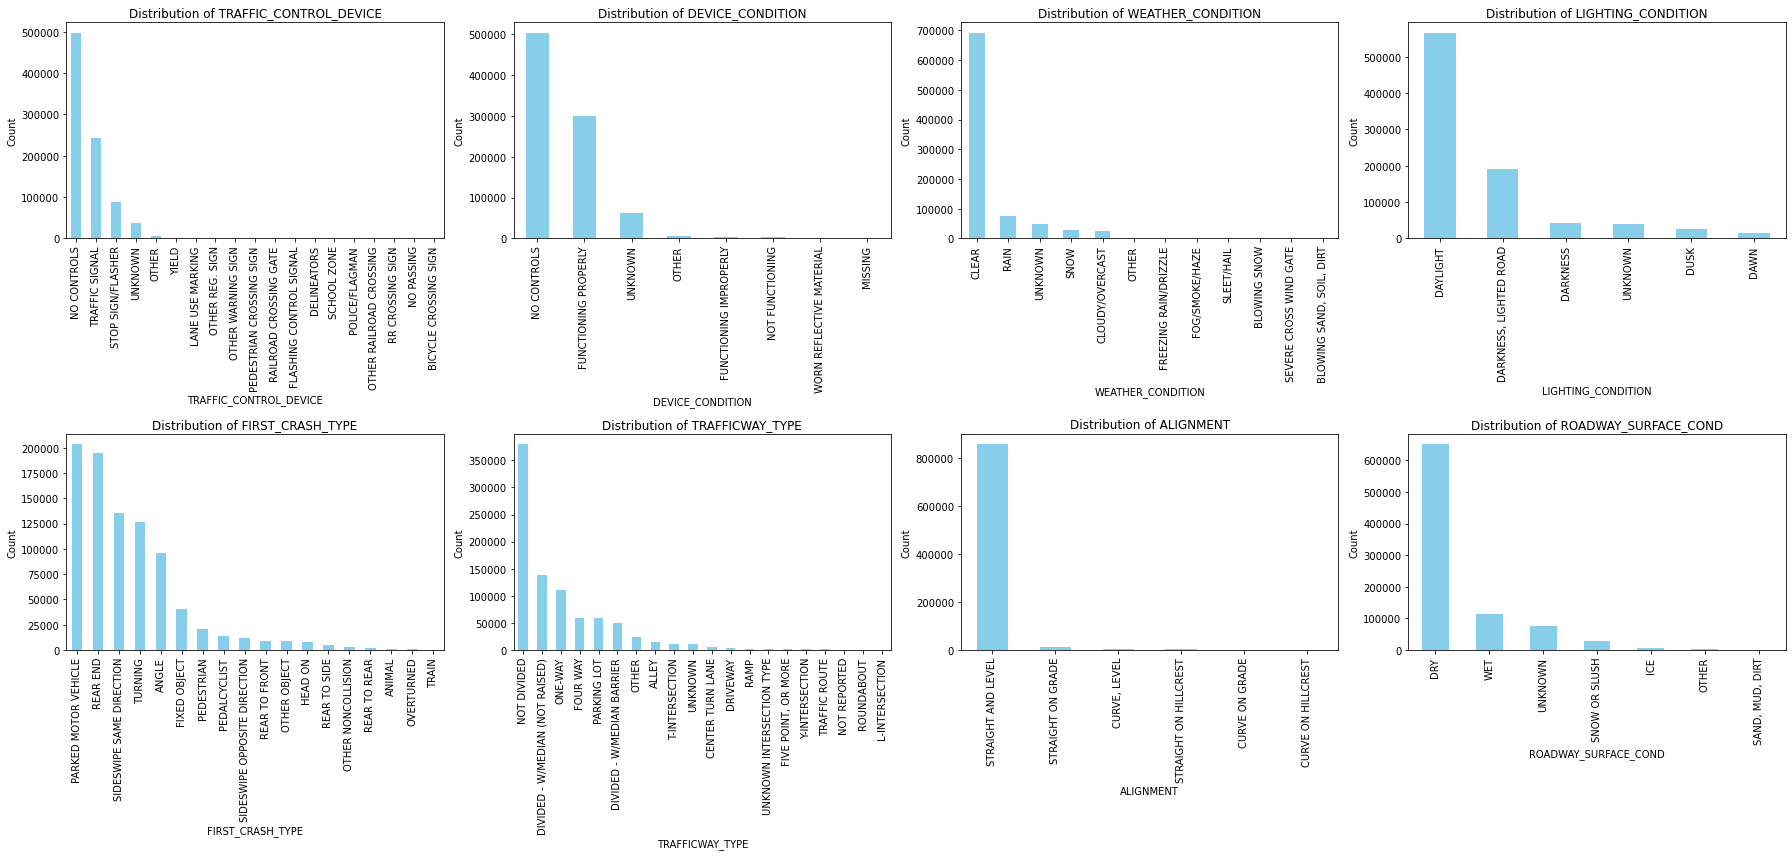

In [165]:
#we will remove STREET_NAME as it is hard to represent in the plot
if 'STREET_NAME' in categorical_columns:
  categorical_columns.remove('STREET_NAME')
else:
  print('STREET_NAME column already removed')

# Determine number of rows and columns for the subplots based on the number of categorical columns
n_cols = 4
n_rows = (len(categorical_columns[:8]) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols,figsize=(25, 12)) #create subplots

axes = axes.flatten() #flatten axes

#plot each categorical column in a subplot
for i, col in enumerate(categorical_columns[:8]):
    relevant_data[col].value_counts().plot(kind = 'bar', ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() #prevent overlapping
plt.show()

In [166]:
for col in categorical_columns:
    print(col, relevant_data[col].nunique())

TRAFFIC_CONTROL_DEVICE 19
DEVICE_CONDITION 8
WEATHER_CONDITION 12
LIGHTING_CONDITION 6
FIRST_CRASH_TYPE 18
TRAFFICWAY_TYPE 20
ALIGNMENT 6
ROADWAY_SURFACE_COND 7
ROAD_DEFECT 7
CRASH_TYPE 2
DAMAGE 3
MOST_SEVERE_INJURY 5
PRIM_CONTRIBUTORY_CAUSE_GROUPED 6
CRASH_HOUR 24
CRASH_DAY_OF_WEEK 7
CRASH_MONTH 12


STREET_NAME column already removed


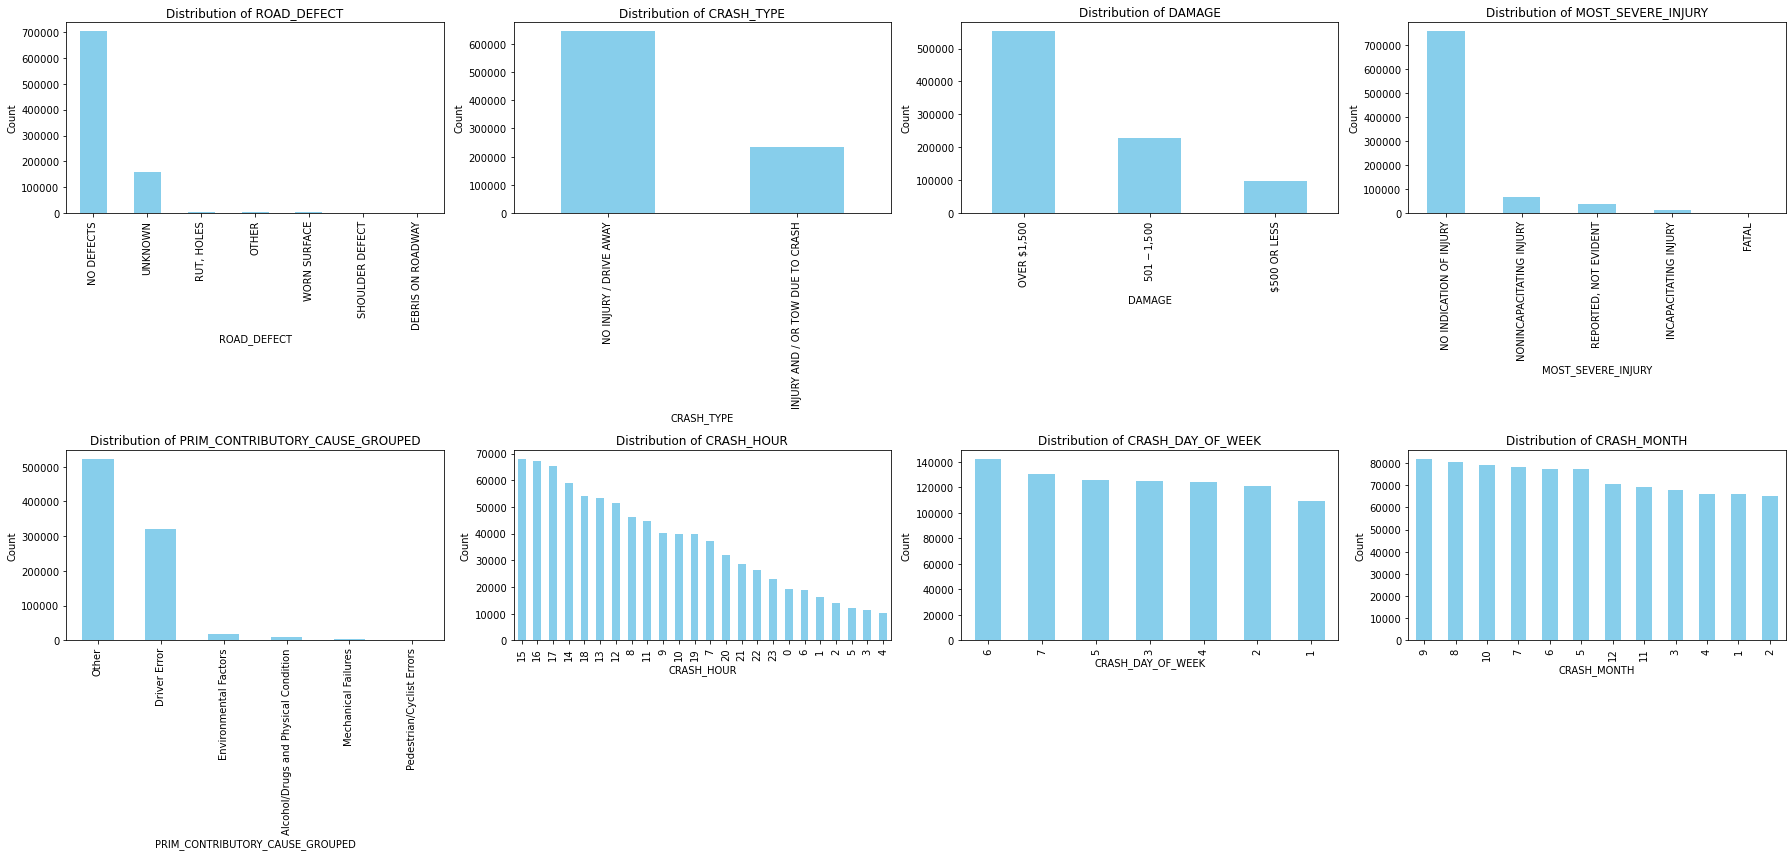

We now have 16 categorical columns and 6 continuous columns


In [167]:
#plot the rest of the categorical columns
#we will remove STREET_NAME as it is hard to represent in the plot
if 'STREET_NAME' in categorical_columns:
  categorical_columns.remove('STREET_NAME')
else:
  print('STREET_NAME column already removed')

# Determine number of rows and columns for the subplots based on the number of categorical columns
n_cols = 4
n_rows = (len(categorical_columns[8:]) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols,figsize=(25, 12)) #create subplots

axes = axes.flatten() #flatten axes

#plot each categorical column in a subplot
for i, col in enumerate(categorical_columns[8:]):
    relevant_data[col].value_counts().plot(kind = 'bar', ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() #prevent overlapping
plt.show()
print(f"We now have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

**Specific Observations for Data Understanding and Preparation:**

**Target Variable (`PRIM_CONTRIBUTORY_CAUSE_GROUPED`)**
- **Highly imbalanced**
- **High cardinality** (6 categories)
- **Approach**: Consider label encoding.

**High Cardinality Features**
- `TRAFFIC_CONTROL_DEVICE`, `FIRST_CRASH_TYPE`, `TRAFFICWAY_TYPE`,`STREET_NAME`
- **Approach**: Apply target\frequency encoding technique.

**Severely Imbalanced Features**
- `WEATHER_CONDITION`, `LIGHTING_CONDITION`, `ROAD_DEFECT`, `DAMAGE`, `MOST_SEVERE_INJURY`
- **Approach**: Group rare categories or use resampling techniques.

**Temporal Features**
- `CRASH_HOUR`, `CRASH_DAY_OF_WEEK`, `CRASH_MONTH`
- **Approach**: Create bins.

**Related Variables**
- `DEVICE_CONDITION` and `TRAFFIC_CONTROL_DEVICE`
- `WEATHER_CONDITION` and `ROADWAY_SURFACE_COND`
- **Approach**: Create interaction features or combined categories.



**Modeling Guidelines**

**Handling Imbalance**
- Use **SMOTE**, **class weighting**, or **ensemble methods**.

**Feature Engineering**
- Create **interaction terms**.
- Bin **continuous variables**.
- Encode **cyclical features**.

**Model Selection**
- **Tree-based models**: Random Forest, Gradient Boosting.
- **Neural networks** with entity embeddings.

**Evaluation Metrics**
- **F1-score**, **precision**, **recall**, **Accuracy**.

**Cross-validation**
- Use **stratified k-fold cross-validation**.

**Interpretability**
- Use **SHAP values** or **LIME** for model explanations.


### **d) Correlation Analysis**

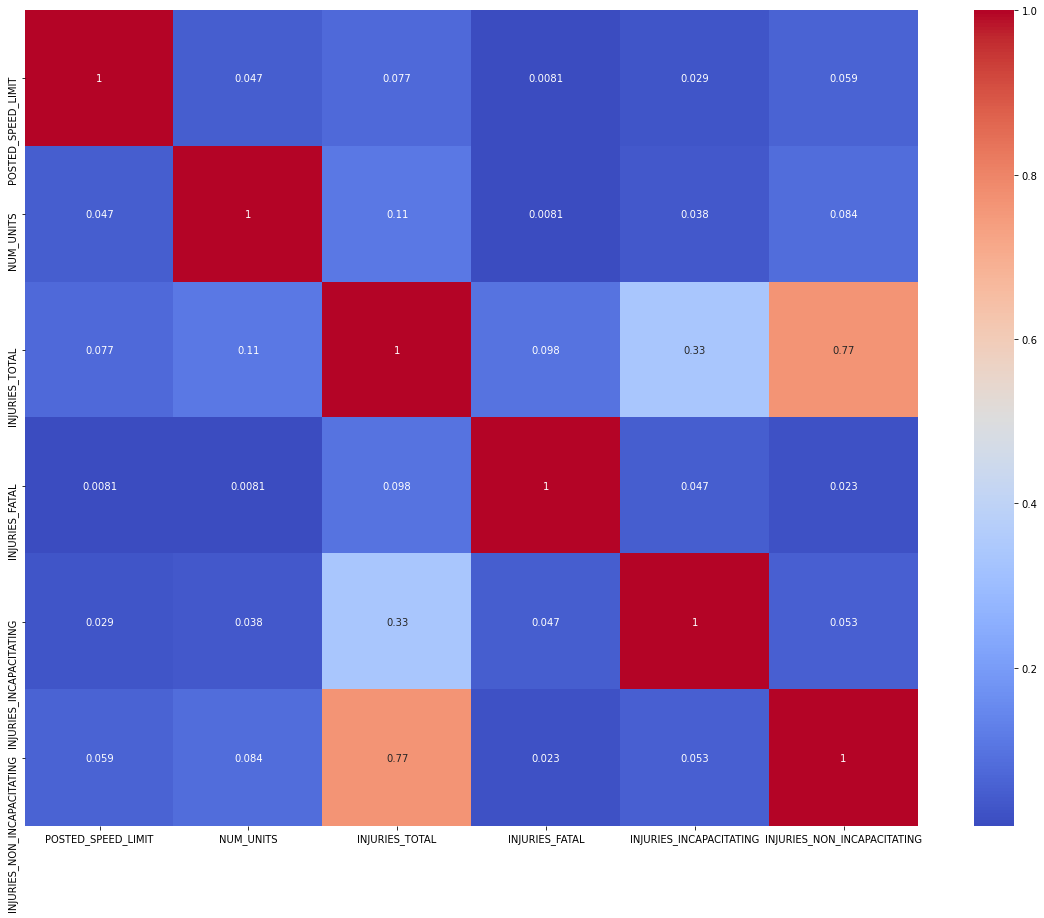

In [68]:
plt.subplots(figsize=(20,15))
sns.heatmap(relevant_data[continuous_columns].corr(),cmap="coolwarm",annot=True);

Our correlation analysis only includes numerical features with only INJURIES_TOTAL and INJURY_NON_INCAPACITATING having high correlation (77%) which is to be expected.

### **e) Encoding, Interaction Terms and Binning**

We will start by splitting our data into a training and test set before proceeding to avoid any data leakage

### **Train Test Split**

In [241]:
from sklearn.model_selection import train_test_split

X=relevant_data.drop('PRIM_CONTRIBUTORY_CAUSE_GROUPED', axis=1)
y=relevant_data['PRIM_CONTRIBUTORY_CAUSE_GROUPED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (615549, 22)
X_test shape: (263807, 22)
y_train shape: (615549,)
y_test shape: (263807,)


### **Binning POSTED_SPEED_LIMIT, CRASH_HOUR, INJURIES_TOTAL**

Binning  involves converting continuous variables into categorical ones by grouping them into defined intervals or "bins. Binning helps in improved model performance as it reduces noise, handles outliers, simplifies relationships, and increases interpretability.

In [245]:
# Define bins and labels for POSTED_SPEED_LIMIT
speed_bins = [0, 20, 40, 60, float('inf')]
speed_labels = ['Low Speed (0-20)', 'Moderate Speed (21-40)', 'High Speed (41-60)', 'Very High Speed (61+)']

# Define bins and labels for CRASH_HOUR
hour_bins = [0, 6, 12, 18, 24]
hour_labels = ['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)']

# Define bins and labels for INJURIES_TOTAL
injury_bins = [0, 1, 4, 7, float('inf')]
injury_labels = ['No Injuries', 'Few Injuries (1-3)', 'Moderate Injuries (4-6)', 'High Injuries (7+)']

# Apply binning to the training set
X_train['speed_limit_binned'] = pd.cut(X_train['POSTED_SPEED_LIMIT'], bins=speed_bins, labels=speed_labels, right=False)
X_train['crash_hour_binned'] = pd.cut(X_train['CRASH_HOUR'], bins=hour_bins, labels=hour_labels, right=False)
X_train['injuries_binned'] = pd.cut(X_train['INJURIES_TOTAL'], bins=injury_bins, labels=injury_labels, right=False)

# Apply binning to the test set
X_test['speed_limit_binned'] = pd.cut(X_test['POSTED_SPEED_LIMIT'], bins=speed_bins, labels=speed_labels, right=False)
X_test['crash_hour_binned'] = pd.cut(X_test['CRASH_HOUR'], bins=hour_bins, labels=hour_labels, right=False)
X_test['injuries_binned'] = pd.cut(X_test['INJURIES_TOTAL'], bins=injury_bins, labels=injury_labels, right=False)


### **Interaction Terms FOR WEATHER_CONDITION and ROADWAY_SURFACE_COND**

Interaction terms capture the combined effect of two or more features on the target variable, revealing relationships that might not be apparent when examining each feature individually. This will improve model performance by allowing the models to learn more complex patterns and dependencies in the data. This will help improve predictive accuracy and offers deeper insights into the underlying factors influencing the outcome.


In [247]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le_weather = LabelEncoder()
le_roadway = LabelEncoder()

# Fit and transform the training set
X_train['WEATHER_CONDITION_encoded'] = le_weather.fit_transform(X_train['WEATHER_CONDITION'])
X_train['ROADWAY_SURFACE_COND_encoded'] = le_roadway.fit_transform(X_train['ROADWAY_SURFACE_COND'])

# For the test set, only transform
X_test['WEATHER_CONDITION_encoded'] = le_weather.transform(X_test['WEATHER_CONDITION'])
X_test['ROADWAY_SURFACE_COND_encoded'] = le_roadway.transform(X_test['ROADWAY_SURFACE_COND'])

# Create interaction terms using the encoded columns
X_train['weather_road_interaction'] = X_train['WEATHER_CONDITION_encoded'] * X_train['ROADWAY_SURFACE_COND_encoded']
X_test['weather_road_interaction'] = X_test['WEATHER_CONDITION_encoded'] * X_test['ROADWAY_SURFACE_COND_encoded']


### **Frequency Encoding for STREET_NAME**

In a classification setting, the frequency of occurrences of each street name can be significant. Some streets may be more prone to accidents or certain types of accidents than others, and encoding these frequencies allows the model to learn from this information. Frequency encoding converts categorical street names into numerical values based on their occurrence counts, making them suitable for various classifiers.Unlike label encoding, which assigns arbitrary integers to categories, frequency encoding reflects the actual count of occurrences. This avoids the risk of introducing a false ordinal relationship among street names.

In [251]:
# Count occurrences of each street name in the training set
street_counts_train = X_train['STREET_NAME'].value_counts()
street_counts_test = X_test['STREET_NAME'].value_counts()

# Map the counts back to the original DataFrame for the training set
X_train['street_name_frequency'] = X_train['STREET_NAME'].map(street_counts_train)

# Apply the same frequency mapping to the test set
X_test['street_name_frequency'] = X_test['STREET_NAME'].map(street_counts_test)


In [253]:
# Drop original features that have been processed
columns_to_drop = [
    'POSTED_SPEED_LIMIT',    # Dropped after binning
    'CRASH_HOUR',            # Dropped after binning
    'INJURIES_TOTAL',        # Dropped after binning
    'STREET_NAME'            # Dropped after encoding
]

# For X_train and X_test, drop the original features
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)


Next we do encode the rest of our data. First we need to split this into high cardinality and low cardinality based on the number of features

In [254]:
print('Summary of Frequency Distribution in our Features\n')

# Adjusted condition to include both 'object' and 'category' types
high_cardinality_cols = [
    column for column in X_train.columns 
    if X_train[column].nunique() > 7 and 
    (X_train[column].dtype == 'object' or X_train[column].dtype == 'category' or X_train[column].dtype == 'int')
]

print('High Cardinality Cols:', high_cardinality_cols)

low_cardinality_cols = [
    column for column in X_train.columns 
    if X_train[column].nunique() <= 7 and 
    (X_train[column].dtype == 'object' or X_train[column].dtype == 'category' or X_train[column].dtype == 'int')
]

print('Low Cardinality Cols:', low_cardinality_cols)


Summary of Frequency Distribution in our Features

High Cardinality Cols: ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'CRASH_MONTH', 'WEATHER_CONDITION_encoded', 'weather_road_interaction']
Low Cardinality Cols: ['LIGHTING_CONDITION', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE', 'MOST_SEVERE_INJURY', 'CRASH_DAY_OF_WEEK', 'speed_limit_binned', 'crash_hour_binned', 'injuries_binned', 'ROADWAY_SURFACE_COND_encoded']


In [255]:
for col in X_train.columns:
    print(col, X_train[col].nunique())

TRAFFIC_CONTROL_DEVICE 19
DEVICE_CONDITION 8
WEATHER_CONDITION 12
LIGHTING_CONDITION 6
FIRST_CRASH_TYPE 18
TRAFFICWAY_TYPE 20
ALIGNMENT 6
ROADWAY_SURFACE_COND 7
ROAD_DEFECT 7
CRASH_TYPE 2
DAMAGE 3
NUM_UNITS 16
MOST_SEVERE_INJURY 5
INJURIES_FATAL 4
INJURIES_INCAPACITATING 9
INJURIES_NON_INCAPACITATING 19
CRASH_DAY_OF_WEEK 7
CRASH_MONTH 12
speed_limit_binned 4
crash_hour_binned 4
injuries_binned 4
WEATHER_CONDITION_encoded 12
ROADWAY_SURFACE_COND_encoded 7
weather_road_interaction 38
street_name_frequency 539


Feature Summary (Before Encoding)

The following features are included in the dataset before applying target encoding and one-hot encoding:

### High Frequency Features (Target Encoding)
- **`TRAFFIC_CONTROL_DEVICE`**: 19 unique values
- **`DEVICE_CONDITION`**: 8 unique values
- **`WEATHER_CONDITION`**: 12 unique values
- **`FIRST_CRASH_TYPE`**: 18 unique values
- **`TRAFFICWAY_TYPE`**: 20 unique values
- **`ALIGNMENT`**: 6 unique values
- **`ROADWAY_SURFACE_COND`**: 7 unique values
- **`ROAD_DEFECT`**: 7 unique values
- **`NUM_UNITS`**: 16 unique values
- **`MOST_SEVERE_INJURY`**: 5 unique values
- **`INJURIES_FATAL`**: 4 unique values
- **`INJURIES_INCAPACITATING`**: 9 unique values
- **`INJURIES_NON_INCAPACITATING`**: 19 unique values
- **`CRASH_DAY_OF_WEEK`**: 7 unique values
- **`CRASH_MONTH`**: 12 unique values

### Low Frequency Features (One-Hot Encoding)
- **`LIGHTING_CONDITION`**: 6 unique values
- **`CRASH_TYPE`**: 2 unique values
- **`DAMAGE`**: 3 unique values

### Binned Features
- **`speed_limit_binned`**: 4 unique values
- **`crash_hour_binned`**: 4 unique values
- **`injuries_binned`**: 4 unique values

### Label/Frequency Encoded Features
- **`WEATHER_CONDITION_encoded`**: 12 unique values
- **`ROADWAY_SURFACE_COND_encoded`**: 7 unique values
- **`street_name_frequency`**: 539 unique values

### Interaction Terms
- **`weather_road_interaction`**: 38 unique values

This feature set will undergo target encoding for high-frequency features and one-hot encoding for low-frequency features to prepare it for the modeling phase.


### **Label Encoding**

Our target 'PRIM_CONTRIBUTORY_CAUSE' has 40 unique values whuch have a natural order so we will use label encoding for this.
Label encoding the target variable is crucial because many machine learning algorithms require numeric input. By converting the categorical target into numerical values, we enable algorithms  to interpret and process the target effectively. This step ensures the model can measure relationships between features and target classes accurately, improving the overall performance and interpretability of the model.

In [258]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for the target
le = LabelEncoder()

# Reset the index of y_train and y_test
#y_train = y_train.reset_index(drop=True)
#y_test = y_test.reset_index(drop=True)

# Encode y_train and y_test
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create new Pandas Series with the encoded values and the old indexes
y_train = pd.Series(y_train_encoded, index=y_train.index)
y_test = pd.Series(y_test_encoded, index=y_test.index)

y_train.unique()

array([4, 1, 2, 3, 0, 5])

In [259]:
y_train.value_counts()

4    366218
1    225047
2     13614
0      6448
3      3770
5       452
dtype: int64

#### **Target Encoding**
We will use target encoding to deal with our high cardinality features.

Target encoding replaces each category with the mean of the target variable for that category. This reduces the dimensionality by not increasing the number of features, which can help in preventing overfitting. Example: If a category is frequently associated with an outcome related to the values in our target (e.g., No INDICATION OF INJURY), the encoding will reflect that association. Target encoding should not alter the shape of our data

In [41]:
!pip install category_encoders

In [260]:
from category_encoders import TargetEncoder

#encode the high cardinality features
te = TargetEncoder(cols=high_cardinality_cols) #create encoder instance
te.fit(X_train, y_train_encoded) #fit the encoder
X_train_te = te.transform(X_train) #transfrom X_train
X_test_te = te.transform(X_test)  #transfrom X_test

#assign the transform values into a dataframe
X_train_te_df = pd.DataFrame(X_train_te, columns=X_train[high_cardinality_cols].columns)
X_test_te_df = pd.DataFrame(X_test_te, columns=X_test[high_cardinality_cols].columns)

#drop the original low cardinality features from our train and test set
X_train = X_train.drop(columns=high_cardinality_cols)
X_test = X_test.drop(columns=high_cardinality_cols)

# reset index of Train and Test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

#reset index of te df
X_train_te_df = X_train_te_df.reset_index(drop=True)
X_test_te_df = X_test_te_df.reset_index(drop=True)

#update train and test feature set with the encoded values
X_train = pd.concat([X_train, X_train_te_df], axis=1)
X_test = pd.concat([X_test, X_test_te_df], axis=1)

Below we do some tests to check the integrity of our data after target encoding it



In [261]:
X_train.shape

(615549, 25)

In [262]:
X_train.head()

,LIGHTING_CONDITION,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_FATAL,INJURIES_INCAPACITATING,...,ROADWAY_SURFACE_COND_encoded,street_name_frequency,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,CRASH_MONTH,WEATHER_CONDITION_encoded,weather_road_interaction
0,DAYLIGHT,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",2,NO INDICATION OF INJURY,0.0,0.0,...,0,2539,2.522502,2.456771,2.780833,3.026217,2.477828,2.821468,2.780833,2.767103
1,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",2,NO INDICATION OF INJURY,0.0,0.0,...,0,635,2.988227,2.971633,2.780833,2.558411,3.100338,2.829791,2.780833,2.767103
2,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,$500 OR LESS,2,NO INDICATION OF INJURY,0.0,0.0,...,0,25,2.988227,2.971633,2.780833,3.415856,2.934549,2.791856,2.780833,2.767103
3,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,$500 OR LESS,2,NO INDICATION OF INJURY,0.0,0.0,...,0,5229,2.522502,2.456771,2.780833,2.289852,2.813515,2.791856,2.780833,2.767103
4,UNKNOWN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",2,NO INDICATION OF INJURY,0.0,0.0,...,0,4403,2.988227,3.273286,2.780833,2.289852,2.686206,2.823555,2.780833,2.767103


In [263]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (615549, 25)
X_test shape: (263807, 25)
y_train shape: (615549,)
y_test shape: (263807,)


### **One Hot Encoding**

One-hot encoding is essential for converting categorical features into a binary matrix representation, where each category is represented as a separate binary column. This process prevents the model from assuming any ordinal relationship between categorical values, which can be misleading when categories have no inherent order (e.g., weather conditions or traffic control devices). By applying one-hot encoding, we ensure that the model treats each category independently, improving its ability to capture the true relationships between features and the target.
We expect one hot encoding to change the shape of our data by increasing the number of features.

In [265]:
from sklearn.preprocessing import OneHotEncoder

#fit the ohe
ohe = OneHotEncoder(handle_unknown="ignore", drop="first")
ohe.fit(X_train[low_cardinality_cols])

#transform our train and test feature set
X_train_ohe = ohe.transform(X_train[low_cardinality_cols])
X_test_ohe = ohe.transform(X_test[low_cardinality_cols])

#assign the transform values into a dataframe
X_train_ohe_df = pd.DataFrame(X_train_ohe.toarray(), columns=ohe.get_feature_names_out(X_train[low_cardinality_cols].columns))
X_test_ohe_df = pd.DataFrame(X_test_ohe.toarray(), columns=ohe.get_feature_names_out(X_test[low_cardinality_cols].columns))

#drop the original low cardinality features from our train and test set
X_train = X_train.drop(low_cardinality_cols, axis=1)
X_test = X_test.drop(low_cardinality_cols, axis=1)

# reset index of Train and Test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

#reset index of ohe
X_train_ohe_df = X_train_ohe_df.reset_index(drop=True)
X_test_ohe_df = X_test_ohe_df.reset_index(drop=True)


#update train and test feature set with the encoded values
X_train = pd.concat([X_train, X_train_ohe_df], axis=1 )
X_test = pd.concat([X_test, X_test_ohe_df], axis=1)

X_train.head()

,NUM_UNITS,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,street_name_frequency,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,crash_hour_binned_Night (0-6),injuries_binned_High Injuries (7+),injuries_binned_Moderate Injuries (4-6),injuries_binned_No Injuries,ROADWAY_SURFACE_COND_encoded_1,ROADWAY_SURFACE_COND_encoded_2,ROADWAY_SURFACE_COND_encoded_3,ROADWAY_SURFACE_COND_encoded_4,ROADWAY_SURFACE_COND_encoded_5,ROADWAY_SURFACE_COND_encoded_6
0,2,0.0,0.0,0.0,2539,2.522502,2.456771,2.780833,3.026217,2.477828,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,635,2.988227,2.971633,2.780833,2.558411,3.100338,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,25,2.988227,2.971633,2.780833,3.415856,2.934549,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,5229,2.522502,2.456771,2.780833,2.289852,2.813515,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.0,0.0,0.0,4403,2.988227,3.273286,2.780833,2.289852,2.686206,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [266]:
X_test.head()

,NUM_UNITS,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,street_name_frequency,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,crash_hour_binned_Night (0-6),injuries_binned_High Injuries (7+),injuries_binned_Moderate Injuries (4-6),injuries_binned_No Injuries,ROADWAY_SURFACE_COND_encoded_1,ROADWAY_SURFACE_COND_encoded_2,ROADWAY_SURFACE_COND_encoded_3,ROADWAY_SURFACE_COND_encoded_4,ROADWAY_SURFACE_COND_encoded_5,ROADWAY_SURFACE_COND_encoded_6
0,2,0.0,0.0,0.0,107,2.988227,2.971633,2.780833,3.026217,3.078812,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,459,2.988227,2.971633,3.543188,3.026217,2.813515,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.0,0.0,0.0,2718,2.486455,2.456771,2.780833,2.289852,2.686206,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,120,2.356478,2.464039,2.780833,2.241562,2.347791,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0.0,0.0,0.0,486,2.988227,2.971633,2.780833,2.241562,2.347791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [267]:
print('No. of rows in encoded data:', (X_train.shape[0]+X_test.shape[0]))
print('No. of rows in original data:', (relevant_data.shape[0]))
print(f'No of features in encoded data {X_train.shape[1]} in Train Set and {X_test.shape[1]} in test set:')
print('No. of features in original data:', (relevant_data.drop('MOST_SEVERE_INJURY', axis=1).shape[1]))

No. of rows in encoded data: 879356
No. of rows in original data: 879356
No of features in encoded data 63 in Train Set and 63 in test set:
No. of features in original data: 22


Our data looks ok.

### **f) Correlation Analysis**

Below, we run correlation analysis afresh after encoding our data as this will give us a better representation of the correlation our features have with the target variable since we have a numerical representation of our dataset.

In [ ]:
def analyze_and_plot_correlations(df, threshold=0.5, target=None):
    # Compute correlation matrix
    corr_matrix = df.corr()

    # Plot heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix of All Features', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Get high correlations
    high_corrs = corr_matrix.unstack()
    high_corrs = high_corrs[(abs(high_corrs) > threshold) & (abs(high_corrs) < 1.0)]
    high_corrs = high_corrs.sort_values(ascending=False).reset_index()
    high_corrs.columns = ['Feature 1', 'Feature 2', 'Correlation']

    # Print highly correlated feature pairs
    print("Highly correlated feature pairs:")
    for _, row in high_corrs.iterrows():
        print(f"{row['Feature 1']} - {row['Feature 2']}: {row['Correlation']:.2f}")

    # Focus on specific feature correlations if provided
    if target is not None:
        target_corrs = corr_matrix[target]
        target_corrs = target_corrs[(abs(target_corrs) > threshold) & (abs(target_corrs) < 1.0)]
        target_corrs = target_corrs.sort_values(key=abs, ascending=False)

        print(f"\nFeatures highly correlated with {target}:")
        for feat, corr in target_corrs.items():
            print(f"{feat}: {corr:.2f}")


X_train_plus_target = pd.concat([X_train, y_train.rename('PRIM_CONTRIBUTORY_CAUSE_GROUPED')], axis=1) #add back y_train to X_train to perform correlation analysis

analyze_and_plot_correlations(X_train_plus_target, threshold=0.0, target='PRIM_CONTRIBUTORY_CAUSE_GROUPED')


In [240]:
X_test.isna().sum().sum()

60

Our data is ready for modeling. We have several highly correlated features which is expected after One Hot Encoding. We will keep the unrelated features in mind when we are modeling to prevent the effects of multicollinearity.E.g. we may neeed to use Principal Component Analysis to transform the feature space into a smaller set of uncorrelated variable which will also help in reducing dimensionality.

# 4. Modeling

In [191]:
#import necessary packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from keras import models, layers, optimizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA


c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### **1) Baseline Model: Dummy Classifier**

In [236]:
# Fit the DummyClassifier (baseline model)
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

# Predict using the baseline model on the test set
y_pred_baseline = dummy_clf.predict(X_test)

# Calculate accuracy score
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Model Accuracy: {accuracy_baseline:.4f}")

# Generate the classification report
print("\nBaseline Model Classification Report:")
print(classification_report(y_test, y_pred_baseline, zero_division=0, target_names=relevant_data['PRIM_CONTRIBUTORY_CAUSE_GROUPED'].unique()));

Baseline Model Accuracy: 0.5953

Baseline Model Classification Report:
                                      precision    recall  f1-score   support

                        Driver Error       0.00      0.00      0.00      2826
                               Other       0.00      0.00      0.00     96287
               Environmental Factors       0.00      0.00      0.00      5845
                 Mechanical Failures       0.00      0.00      0.00      1631
           Pedestrian/Cyclist Errors       0.60      1.00      0.75    157033
Alcohol/Drugs and Physical Condition       0.00      0.00      0.00       185

                            accuracy                           0.60    263807
                           macro avg       0.10      0.17      0.12    263807
                        weighted avg       0.35      0.60      0.44    263807



**Baseline Model Evaluation**

**Baseline Model Accuracy:** The accuracy of the baseline model is **0.5953**, indicating that the model correctly predicts approximately 59.53% of the instances. 

**Findings**
- The model exhibits a strong **imbalance in predictions**, as it only predicts the class **"Pedestrian/Cyclist Errors"** effectively, achieving a recall of **1.00**. This indicates that all instances of this class were correctly identified.
- However, the model fails to predict any instances of the other classes, resulting in **zero precision and recall** for them. This highlights a significant shortfall in the model's ability to generalize across all categories.
- The **macro average** metrics indicate overall poor performance, with an F1-score of only **0.12**, emphasizing the need for improvement.


Given the limitations of the baseline model, particularly its inability to predict multiple classes effectively, we will now implement a **Logistic Regression** model. This model is expected to provide a better understanding of the relationships between features and the target variable, potentially improving classification accuracy across all classes. Additionally, logistic regression will allow us to investigate the influence of different factors on the probability of each contributory cause, which is crucial for gaining actionable insights.

Next, we will focus on tuning the logistic regression model to address the issues identified in the baseline evaluation and enhance its predictive capabilities.


### **2) Logistic Regression**

The performance of the baseline dummy classifier highlights the need for a more robust modeling approach, such as Logistic Regression, which is capable of learning from the feature set and identifying patterns that the dummy model failed to capture.

**Data Scaling**
Before fitting the logistic regression model, we applied **data scaling** to our features. Scaling is crucial for the following reasons:
- **Uniformity**: Many machine learning algorithms, including logistic regression, are sensitive to the scale of the input features. Features with larger ranges can disproportionately influence the model's performance, leading to biased results.
- **Improved Convergence**: Scaling helps gradient-based optimization algorithms converge faster and more reliably, which is especially important in models like logistic regression.

**Principal Component Analysis (PCA)**
After scaling the data, we performed **Principal Component Analysis (PCA)** to reduce the dimensionality of our feature space. PCA is necessary for several reasons:
- **Dimensionality Reduction**: With a large number of features, PCA helps simplify the dataset by transforming it into a smaller set of uncorrelated components. This reduces the risk of overfitting while retaining most of the variance in the data.
- **Noise Reduction**: PCA can help filter out noise and less informative features, leading to more robust model performance.
- **Improved Interpretability**: By reducing the number of features, PCA makes it easier to visualize and interpret the underlying patterns in the data, aiding in decision-making.


By scaling our data and applying PCA, we enhance the performance and interpretability of the logistic regression model, ensuring it is more efficient and effective at capturing the relationships within the data. This step is essential given the high dimensionality and varying scales of the features present in our dataset.


In [237]:
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train)
X_test_pca = scaler.transform(X_test)

pca = PCA(n_components=0.9, svd_solver='full')  # Retain 90% of variance
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [53]:
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42) #instaniate our logistic regression model

logreg.fit(X_train_pca, y_train)

y_pred = logreg.predict(X_test_pca)

# Calculate accuracy score
accuracy_baseline = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy_baseline:.4f}")

# Generate the classification report
print("\nLogistic Regression Model Classification Report:")
print(classification_report(y_test, y_pred_baseline, zero_division=0, target_names=relevant_data['PRIM_CONTRIBUTORY_CAUSE_GROUPED'].unique()));


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Baseline Model Accuracy: 0.6372

Logistic Regression Model Classification Report:
                                      precision    recall  f1-score   support

                        Driver Error       0.00      0.00      0.00       278
                               Other       0.00      0.00      0.00      9589
               Environmental Factors       0.00      0.00      0.00       591
Alcohol/Drugs and Physical Condition       0.00      0.00      0.00       167
                 Mechanical Failures       0.60      1.00      0.75     15707
           Pedestrian/Cyclist Errors       0.00      0.00      0.00        21

                            accuracy                           0.60     26353
                           macro avg       0.10      0.17      0.12     26353
                        weighted avg       0.36      0.60      0.45     26353



In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Apply SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)



# Fit the logistic regression model on resampled data
log_reg_smote = LogisticRegression(max_iter=10000, solver='lbfgs', penalty ='l2',C=1)
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_smote = log_reg_smote.predict(X_test_pca)

# Print classification report
print("Logistic Regression Model after SMOTE:")
print('accuracy score', accuracy_score(y_test, y_pred_smote,zero_division=0, target_names=relevant_data['PRIM_CONTRIBUTORY_CAUSE_GROUPED'].unique()));))
print(classification_report(y_test, y_pred_smote))


Logistic Regression Model after SMOTE:
accuracy score 0.33518005540166207
              precision    recall  f1-score   support

           0       0.06      0.52      0.10       278
           1       0.53      0.35      0.42      9589
           2       0.11      0.63      0.19       591
           3       0.02      0.28      0.03       167
           4       0.82      0.31      0.45     15707
           5       0.00      0.29      0.00        21

    accuracy                           0.34     26353
   macro avg       0.26      0.40      0.20     26353
weighted avg       0.68      0.34      0.43     26353



In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize model
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# Define a simplified param grid
param_grid = {
    'C': [0.01, 1, 100],  # Regularization strength
    'penalty': ['l2'],     # Focus on one penalty
    'solver': ['lbfgs'],   # Use one solver
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=logreg,
                                   param_distributions=param_grid,
                                   n_iter=5,             # Fewer iterations
                                   scoring='f1_weighted',
                                   cv=3,                 # Fewer folds
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)

# Fit the model
random_search.fit(X_train_pca, y_train)  # Make sure you're using PCA here

# Display the best parameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score (F1):", random_search.best_score_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}
Best Score (F1): 0.6107428247146846


In [56]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit the model on the training data
rf_model.fit(X_train_pca, y_train)
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_pca)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

class_report_rf = classification_report(y_test, y_pred_rf,zero_division=0, target_names=relevant_data['PRIM_CONTRIBUTORY_CAUSE_GROUPED'].unique())

print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print('Classification Report:')
print(class_report_rf)


Random Forest Accuracy: 0.6183
Classification Report:
                                      precision    recall  f1-score   support

                        Driver Error       0.18      0.01      0.01       278
                               Other       0.53      0.41      0.46      9589
               Environmental Factors       0.28      0.05      0.08       591
Alcohol/Drugs and Physical Condition       0.00      0.00      0.00       167
                 Mechanical Failures       0.66      0.78      0.72     15707
           Pedestrian/Cyclist Errors       0.00      0.00      0.00        21

                            accuracy                           0.62     26353
                           macro avg       0.27      0.21      0.21     26353
                        weighted avg       0.59      0.62      0.60     26353



In [57]:
import xgboost as xgb

# Convert your data into DMatrix format, which is optimized for XGBoost
dtrain = xgb.DMatrix(X_train_pca, label=y_train)
dtest = xgb.DMatrix(X_test_pca, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(y.unique()),   # Number of classes
    'max_depth': 6,                 # Maximum depth of the tree
    'eta': 0.3,                     # Learning rate
    'subsample': 0.8,               # Subsample ratio
    'colsample_bytree': 0.8,        # Column sample ratio
    'seed': 42                      # Random seed
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')
print('Classification Report:')
print(class_report_xgb)


XGBoost Accuracy: 0.6325
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.01      0.03       278
           1       0.54      0.48      0.51      9589
           2       0.30      0.08      0.12       591
           3       0.17      0.01      0.01       167
           4       0.68      0.76      0.72     15707
           5       0.00      0.00      0.00        21

    accuracy                           0.63     26353
   macro avg       0.33      0.22      0.23     26353
weighted avg       0.61      0.63      0.62     26353



Num GPUs Available:  0
Epoch 1/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5108 - loss: 1.1668 - val_accuracy: 0.6402 - val_loss: 0.7938
Epoch 2/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6236 - loss: 0.8157 - val_accuracy: 0.6466 - val_loss: 0.7688
Epoch 3/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6227 - loss: 0.7904 - val_accuracy: 0.6477 - val_loss: 0.7573
Epoch 4/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6260 - loss: 0.7734 - val_accuracy: 0.6482 - val_loss: 0.7520
Epoch 5/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6279 - loss: 0.7697 - val_accuracy: 0.6486 - val_loss: 0.7475
Epoch 6/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6265 - loss: 0.7618 - val_accuracy: 0.6490 - val_loss: 0.7450
Epoch 7/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6331 - loss: 0.7672 - val_accuracy: 0.6486 - val_loss: 0.7437
Epoch 8/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Neural Network Accuracy: 0.6405
Confusion Matrix:
[[    0    42     0     0   236     0]
 [    0  4310    22     0  5257     0]
 [    0   194    38     0   359     0]
 [    0    35     1     0   131     0]
 [    0  3134    42     0 12531     0]
 [    0     3     0     0    18     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       278
           1       0.56      0.45      0.50      9589
           2       0.37      0.06      0.11       591
           3       0.00      0.00      0.00       167
           4       0.68      0.80      0.73     15707
           5       0.00      0.00      0.00        21

    accuracy                           0.64     26353
   macro avg       0.27      0.22      0.22     26353
weighted avg       0.61      0.64      0.62     26353



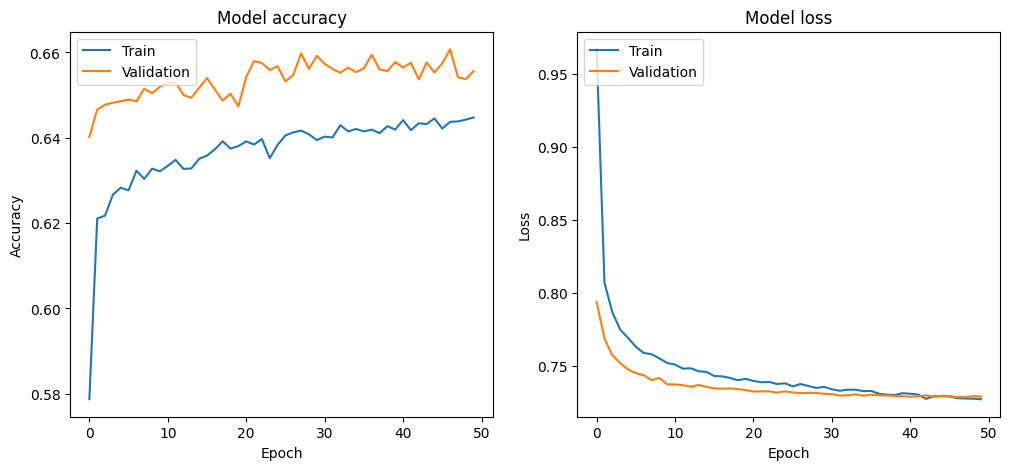

In [58]:
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf

# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpu_available))


# Create a Sequential model
model = keras.Sequential()

# Input layer
model.add(layers.Input(shape=(X_train_pca.shape[1],)))

# Hidden layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))


# Output layer
model.add(layers.Dense(len(y.unique()), activation='softmax'))  # Use softmax for multi-class classification
model.compile(loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# Train the model
history = model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_split=0.2)
# Make predictions
y_pred_nn = np.argmax(model.predict(X_test_pca), axis=-1)

# Evaluate performance
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

print(f'Neural Network Accuracy: {accuracy_nn:.4f}')
print('Confusion Matrix:')
print(conf_matrix_nn)
print('Classification Report:')
print(class_report_nn)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Num GPUs Available:  0
Epoch 1/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.0838 - loss: 2.1417 - val_accuracy: 0.3510 - val_loss: 1.6723
Epoch 2/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1854 - loss: 2.0496 - val_accuracy: 0.3594 - val_loss: 1.6480
Epoch 3/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2146 - loss: 1.8028 - val_accuracy: 0.4057 - val_loss: 1.5946
Epoch 4/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2415 - loss: 1.6902 - val_accuracy: 0.3980 - val_loss: 1.5828
Epoch 5/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2507 - loss: 1.7012 - val_accuracy: 0.3929 - val_loss: 1.5817
Epoch 6/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2634 - loss: 1.6945 - val_accuracy: 0.3424 - val_loss: 1.5810
Epoch 7/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2702 - loss: 1.5748 - val_accuracy: 0.2974 - val_loss: 1.6082
Epoch 8/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy

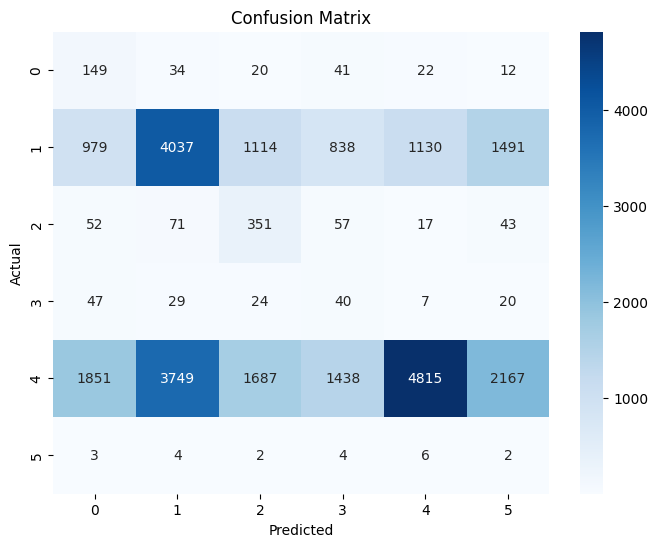

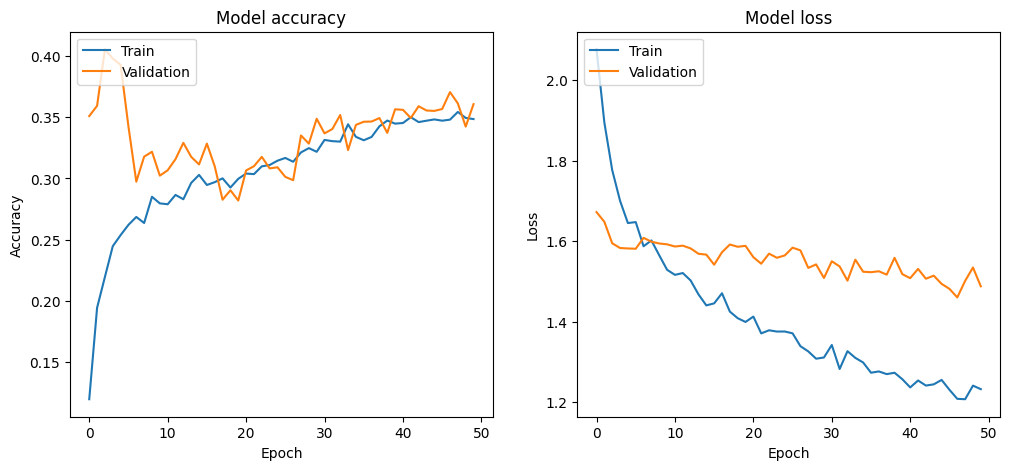

In [61]:
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpu_available))

# Convert y_train to NumPy array with integer values
#y_train = y_train.values.astype(int)  # Ensure values are integers

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
# Create a Sequential model
model = keras.Sequential()

# Input layer
model.add(layers.Input(shape=(X_train_pca.shape[1],)))

# Hidden layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(32, activation='relu'))

# Output layer for multi-class classification
model.add(layers.Dense(len(y.unique()), activation='softmax'))

# Compile the model with a low learning rate and Adam optimizer
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])



# Train the model with early stopping and class weights
history = model.fit(X_train_pca, y_train,
                    epochs=50, batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weight_dict,
                    )

# Make predictions on the test set
y_pred_nn = np.argmax(model.predict(X_test_pca), axis=-1)

# Evaluate performance
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

# Print accuracy and classification report
print(f'Neural Network Accuracy: {accuracy_nn:.4f}')
print('Confusion Matrix:')
print(conf_matrix_nn)
print('Classification Report:')
print(class_report_nn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


# 5. Model Validation

# 6. Conclusion and Summary